In [44]:
import pandas as pd
import nltk
from textblob import TextBlob



Doing Correlation between news and stock movement for AAPL

In [45]:
news_df= pd.read_csv('../data/raw_analyst_ratings.csv')
stock_df= pd.read_csv('../data/data/AAPL.csv')

In [46]:
#Ensure that both datasets (news and stock prices) are aligned 
# by dates

# For news headlines
news_df['date'] = pd.to_datetime(news_df['date'],errors='coerce')
news_df = news_df.dropna(subset=['date'])
news_df['date'] = news_df['date'].dt.date
# For stock prices
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')
stock_df = stock_df.dropna(subset=['Date'])
stock_df['Date'] = stock_df['Date'].dt.date

print(news_df.head())
print(stock_df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock  
0  2020-06-05     A  
1  2020-06-03     A  
2  2020-05-26     A  
3  2020-05-22     A  
4  2020-05-22     A  
        

In [47]:
#Conduct sentiment analysis on news headlines to quantify 
# the tone of each article (positive, negative, neutral)

def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity
news_df['sentiment'] = news_df['headline'].apply(get_sentiment)
print(news_df[['headline', 'sentiment']].head())
def categorize_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

news_df['sentiment_label'] = news_df['sentiment'].apply(categorize_sentiment)
news_df[['headline','sentiment','sentiment_label']].head()



                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0


,headline,sentiment,sentiment_label
0,Stocks That Hit 52-Week Highs On Friday,0.0,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.0,neutral
2,71 Biggest Movers From Friday,0.0,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.0,neutral
4,B of A Securities Maintains Neutral on Agilent...,0.0,neutral


In [48]:
#Calculate Daily Stock Returns: Compute the percentage change in 
# daily closing prices to represent stock movements.


print(stock_df[['Date','Close']].head())
stock_df['Daily_Return'] = stock_df['Close'].pct_change()

stock_df = stock_df.dropna(subset=['Daily_Return'])

print(stock_df[['Date','Close','Daily_Return']].head())
stock_df['Daily_Return_Percent'] = stock_df['Daily_Return'] * 100
print(stock_df[['Date','Close','Daily_Return_Percent']].head())



         Date     Close
0  2009-01-02  2.721686
1  2009-01-05  2.836553
2  2009-01-06  2.789767
3  2009-01-07  2.729484
4  2009-01-08  2.780169
         Date     Close  Daily_Return
1  2009-01-05  2.836553      0.042204
2  2009-01-06  2.789767     -0.016494
3  2009-01-07  2.729484     -0.021609
4  2009-01-08  2.780169      0.018570
5  2009-01-09  2.716589     -0.022869
         Date     Close  Daily_Return_Percent
1  2009-01-05  2.836553              4.220416
2  2009-01-06  2.789767             -1.649399
3  2009-01-07  2.729484             -2.160860
4  2009-01-08  2.780169              1.856959
5  2009-01-09  2.716589             -2.286921


         Date  sentiment
0  2011-04-27   0.000000
1  2011-04-28   0.068182
2  2011-04-29   0.166667
3  2011-04-30   0.500000
4  2011-05-01   0.000000
         Date  sentiment  Daily_Return_Percent
0  2011-04-27   0.000000             -0.077042
1  2011-04-28   0.068182             -0.971032
2  2011-04-29   0.166667              0.974822
3  2011-05-02  -0.009259             -1.099651
4  2011-05-03   0.000000              0.554465
Correlation between news sentiment and daily stock returns: -0.0028


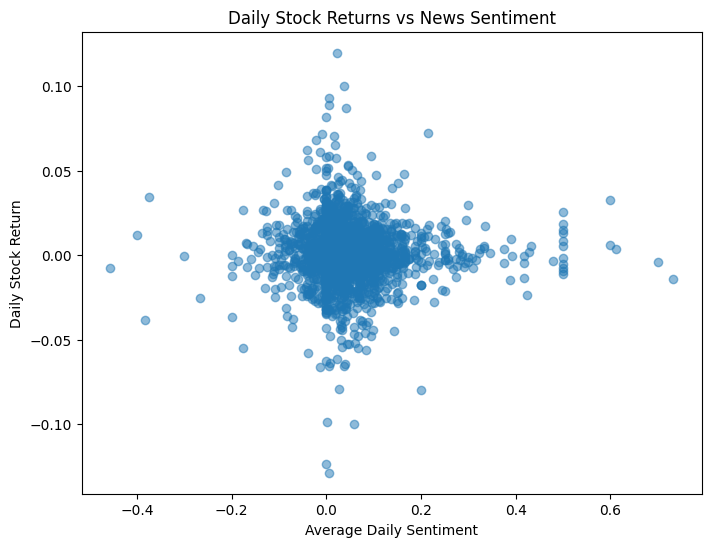

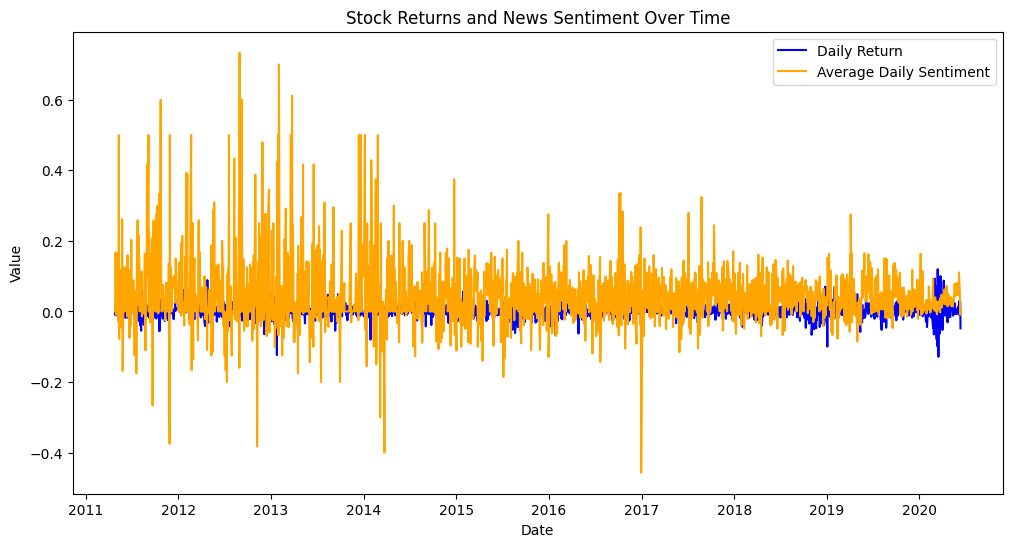

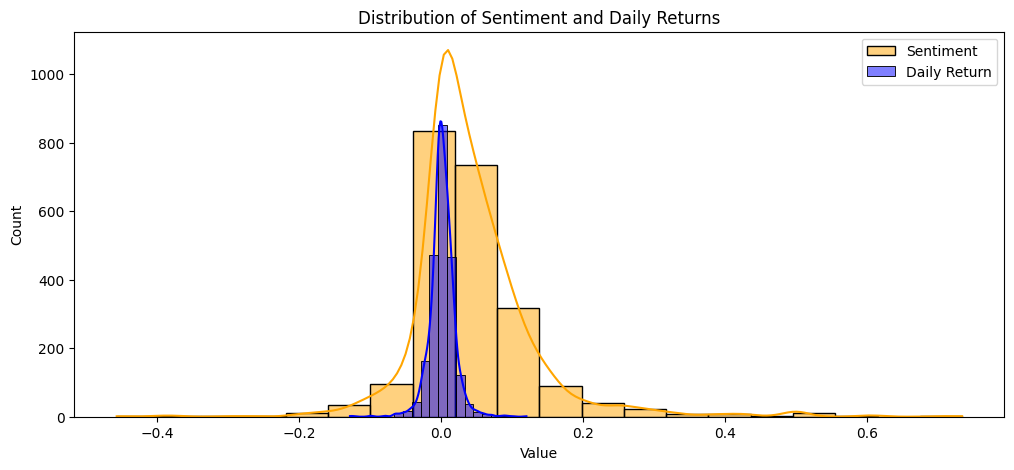

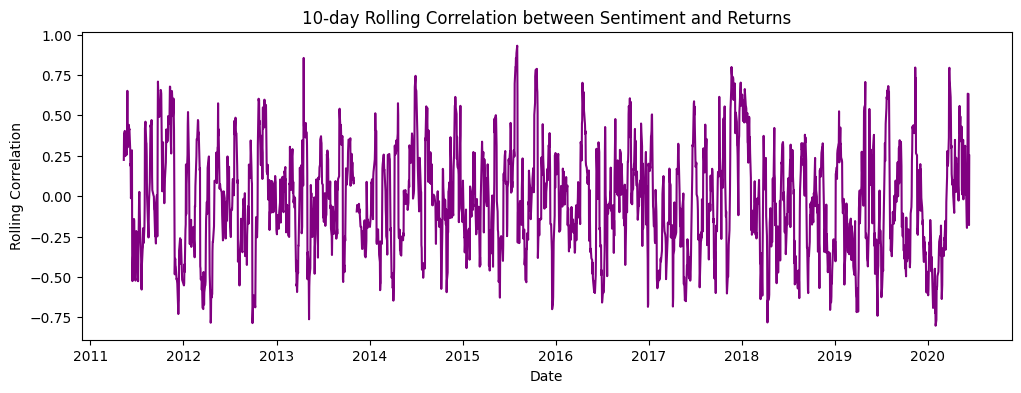

In [49]:
#Correlation Analysis: Use statistical methods to test 
# the correlationbetween daily news sentiment scores 
# and stock returns

# Assume news_df has columns: 'date' and 'sentiment'
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'date':'Date'}, inplace=True)

print(daily_sentiment.head())
merged_df = pd.merge(daily_sentiment, stock_df, on='Date', how='inner')
print(merged_df[['Date','sentiment','Daily_Return_Percent']].head())

correlation = merged_df['Daily_Return'].corr(merged_df['sentiment'])
print(f"Correlation between news sentiment and daily stock returns: {correlation:.4f}")
#visualization correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(merged_df['sentiment'], merged_df['Daily_Return'], alpha=0.5)
plt.title("Daily Stock Returns vs News Sentiment")
plt.xlabel("Average Daily Sentiment")
plt.ylabel("Daily Stock Return")
plt.show()

#visaulization time series
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Daily_Return'], label='Daily Return', color='blue')
plt.plot(merged_df['Date'], merged_df['sentiment'], label='Average Daily Sentiment', color='orange')
plt.title("Stock Returns and News Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

#Density plot 
import seaborn as sns
plt.figure(figsize=(12,5))
sns.histplot(merged_df['sentiment'], kde=True, color='orange', label='Sentiment', bins=20)
sns.histplot(merged_df['Daily_Return'], kde=True, color='blue', label='Daily Return', bins=20)
plt.title("Distribution of Sentiment and Daily Returns")
plt.xlabel("Value")
plt.legend()
plt.show()

#heatmap[Rolling correlation]
merged_df['rolling_corr'] = merged_df['Daily_Return'].rolling(10).corr(merged_df['sentiment'])

plt.figure(figsize=(12,4))
plt.plot(merged_df['Date'], merged_df['rolling_corr'], color='purple')
plt.title("10-day Rolling Correlation between Sentiment and Returns")
plt.xlabel("Date")
plt.ylabel("Rolling Correlation")
plt.show()




In [50]:
###############################################################

Doing Correlation between news and stock movement for AMZN

In [51]:
news_df= pd.read_csv('../data/raw_analyst_ratings.csv')
stock_df= pd.read_csv('../data/data/AMZN.csv')

In [52]:
#Ensure that both datasets (news and stock prices) are aligned 
# by dates

# For news headlines
news_df['date'] = pd.to_datetime(news_df['date'],errors='coerce')
news_df = news_df.dropna(subset=['date'])
news_df['date'] = news_df['date'].dt.date
# For stock prices
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')
stock_df = stock_df.dropna(subset=['Date'])
stock_df['Date'] = stock_df['Date'].dt.date

print(news_df.head())
print(stock_df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock  
0  2020-06-05     A  
1  2020-06-03     A  
2  2020-05-26     A  
3  2020-05-22     A  
4  2020-05-22     A  
        

In [53]:
#Calculate Daily Stock Returns: Compute the percentage change in 
# daily closing prices to represent stock movements.


print(stock_df[['Date','Close']].head())
stock_df['Daily_Return'] = stock_df['Close'].pct_change()

stock_df = stock_df.dropna(subset=['Daily_Return'])

print(stock_df[['Date','Close','Daily_Return']].head())
stock_df['Daily_Return_Percent'] = stock_df['Daily_Return'] * 100
print(stock_df[['Date','Close','Daily_Return_Percent']].head())


         Date  Close
0  2009-01-02  2.718
1  2009-01-05  2.703
2  2009-01-06  2.868
3  2009-01-07  2.810
4  2009-01-08  2.858
         Date   Close  Daily_Return
1  2009-01-05  2.7030     -0.005519
2  2009-01-06  2.8680      0.061043
3  2009-01-07  2.8100     -0.020223
4  2009-01-08  2.8580      0.017082
5  2009-01-09  2.7755     -0.028866
         Date   Close  Daily_Return_Percent
1  2009-01-05  2.7030             -0.551871
2  2009-01-06  2.8680              6.104327
3  2009-01-07  2.8100             -2.022318
4  2009-01-08  2.8580              1.708189
5  2009-01-09  2.7755             -2.886633


In [54]:
news_df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0
         Date  sentiment
0  2011-04-27   0.000000
1  2011-04-28   0.068182
2  2011-04-29   0.166667
3  2011-04-30   0.500000
4  2011-05-01   0.000000
         Date  sentiment  Daily_Return_Percent
0  2011-04-27   0.000000              7.860673
1  2011-04-28   0.068182             -0.793369
2  2011-04-29   0.166667              0.379348
3  2011-05-02  -0.009259              2.747562
4  2011-05-03   0.000000             -1.361898
Correlation between news sentiment and daily stock returns: -0.0194


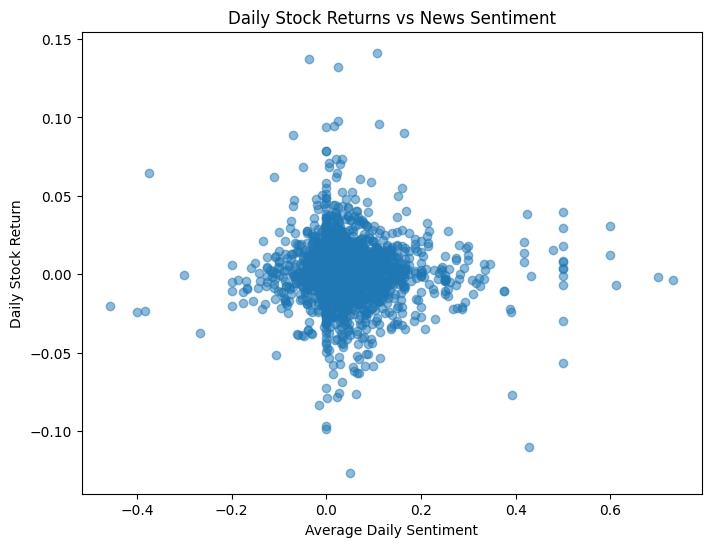

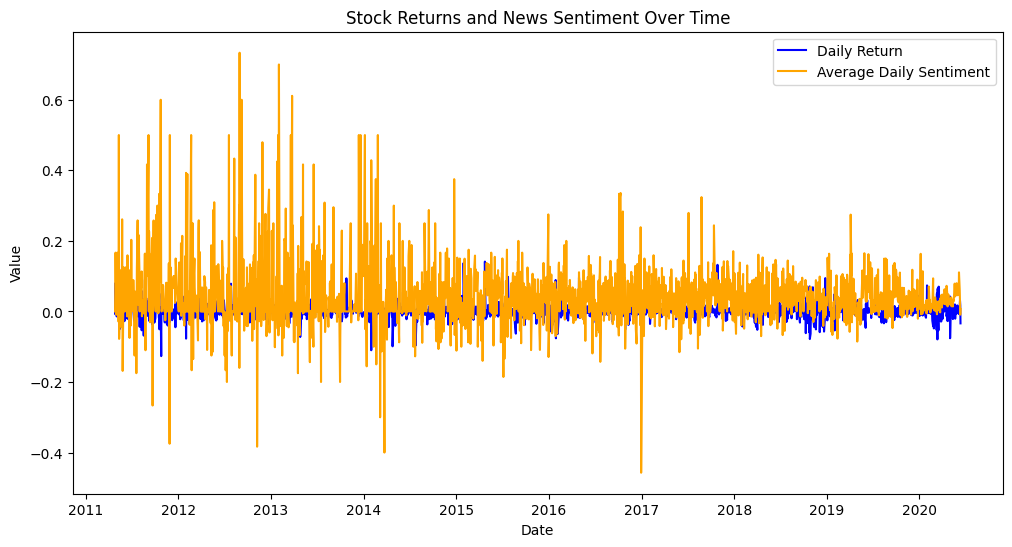

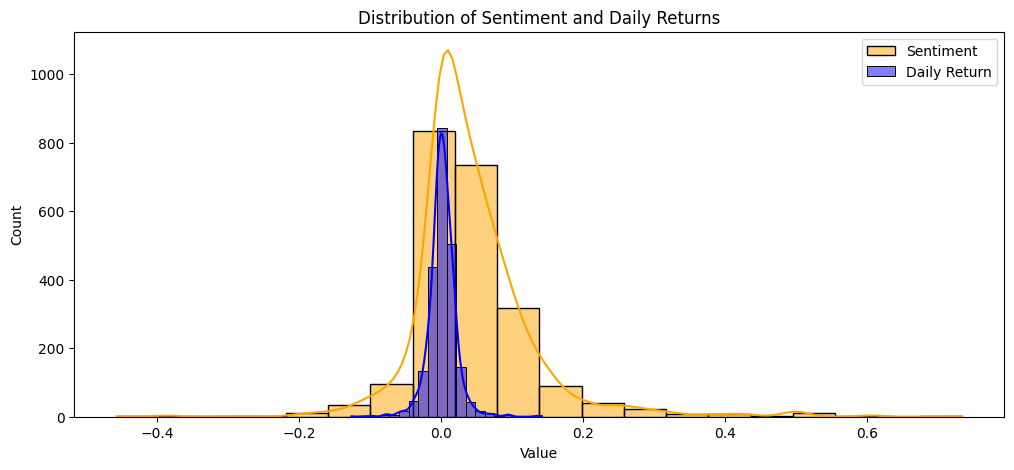

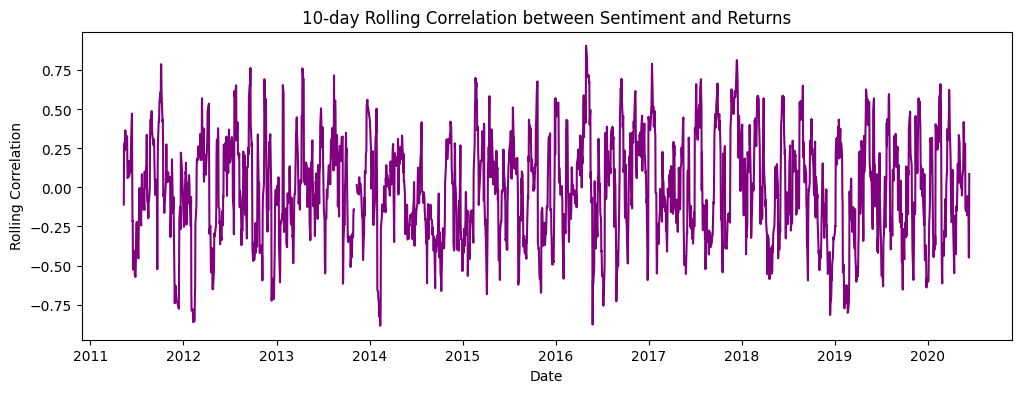

In [55]:
#Correlation Analysis: Use statistical methods to test 
# the correlationbetween daily news sentiment scores 
# and stock returns

# Assume news_df has columns: 'date' and 'sentiment'
news_df['sentiment'] = news_df['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
print(news_df[['headline', 'sentiment']].head())

daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'date':'Date'}, inplace=True)

print(daily_sentiment.head())
merged_df = pd.merge(daily_sentiment, stock_df, on='Date', how='inner')
print(merged_df[['Date','sentiment','Daily_Return_Percent']].head())

correlation = merged_df['Daily_Return_Percent'].corr(merged_df['sentiment'])
print(f"Correlation between news sentiment and daily stock returns: {correlation:.4f}")
#visualization correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(merged_df['sentiment'], merged_df['Daily_Return'], alpha=0.5)
plt.title("Daily Stock Returns vs News Sentiment")
plt.xlabel("Average Daily Sentiment")
plt.ylabel("Daily Stock Return")
plt.show()

#visaulization time series
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Daily_Return'], label='Daily Return', color='blue')
plt.plot(merged_df['Date'], merged_df['sentiment'], label='Average Daily Sentiment', color='orange')
plt.title("Stock Returns and News Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

#Density plot 
import seaborn as sns
plt.figure(figsize=(12,5))
sns.histplot(merged_df['sentiment'], kde=True, color='orange', label='Sentiment', bins=20)
sns.histplot(merged_df['Daily_Return'], kde=True, color='blue', label='Daily Return', bins=20)
plt.title("Distribution of Sentiment and Daily Returns")
plt.xlabel("Value")
plt.legend()
plt.show()

#heatmap[Rolling correlation]
merged_df['rolling_corr'] = merged_df['Daily_Return'].rolling(10).corr(merged_df['sentiment'])

plt.figure(figsize=(12,4))
plt.plot(merged_df['Date'], merged_df['rolling_corr'], color='purple')
plt.title("10-day Rolling Correlation between Sentiment and Returns")
plt.xlabel("Date")
plt.ylabel("Rolling Correlation")
plt.show()




In [56]:
#######################################################

Doing Correlation between news and stock movement for GOOG

In [57]:
news_df= pd.read_csv('../data/raw_analyst_ratings.csv')
stock_df= pd.read_csv('../data/data/GOOG.csv')

In [58]:
#Ensure that both datasets (news and stock prices) are aligned 
# by dates

# For news headlines
news_df['date'] = pd.to_datetime(news_df['date'],errors='coerce')
news_df = news_df.dropna(subset=['date'])
news_df['date'] = news_df['date'].dt.date
# For stock prices
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')
stock_df = stock_df.dropna(subset=['Date'])
stock_df['Date'] = stock_df['Date'].dt.date

print(news_df.head())
print(stock_df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock  
0  2020-06-05     A  
1  2020-06-03     A  
2  2020-05-26     A  
3  2020-05-22     A  
4  2020-05-22     A  
        

In [59]:
#Calculate Daily Stock Returns: Compute the percentage change in 
# daily closing prices to represent stock movements.


print(stock_df[['Date','Close']].head())
stock_df['Daily_Return'] = stock_df['Close'].pct_change()

stock_df = stock_df.dropna(subset=['Daily_Return'])

print(stock_df[['Date','Close','Daily_Return']].head())
stock_df['Daily_Return_Percent'] = stock_df['Daily_Return'] * 100
print(stock_df[['Date','Close','Daily_Return_Percent']].head())

         Date     Close
0  2009-01-02  7.948608
1  2009-01-05  8.115089
2  2009-01-06  8.263762
3  2009-01-07  7.965677
4  2009-01-08  8.044340
         Date     Close  Daily_Return
1  2009-01-05  8.115089      0.020945
2  2009-01-06  8.263762      0.018321
3  2009-01-07  7.965677     -0.036071
4  2009-01-08  8.044340      0.009875
5  2009-01-09  7.794000     -0.031120
         Date     Close  Daily_Return_Percent
1  2009-01-05  8.115089              2.094467
2  2009-01-06  8.263762              1.832057
3  2009-01-07  7.965677             -3.607137
4  2009-01-08  8.044340              0.987523
5  2009-01-09  7.794000             -3.112007


         Date  sentiment
0  2011-04-27   0.000000
1  2011-04-28   0.068182
2  2011-04-29   0.166667
3  2011-04-30   0.500000
4  2011-05-01   0.000000
         Date  sentiment  Daily_Return_Percent
0  2011-04-27   0.000000              0.927145
1  2011-04-28   0.068182              0.039042
2  2011-04-29   0.166667              1.139468
3  2011-05-02  -0.009259             -1.018188
4  2011-05-03   0.000000             -0.867126
Correlation between news sentiment and daily stock returns: 0.0143


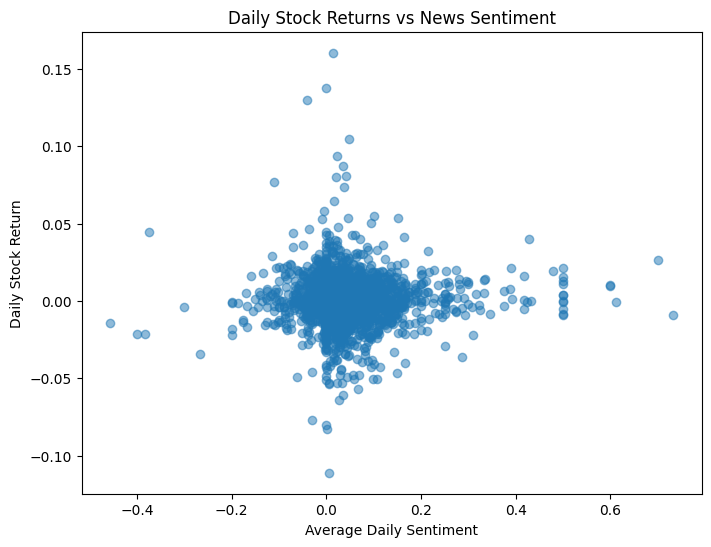

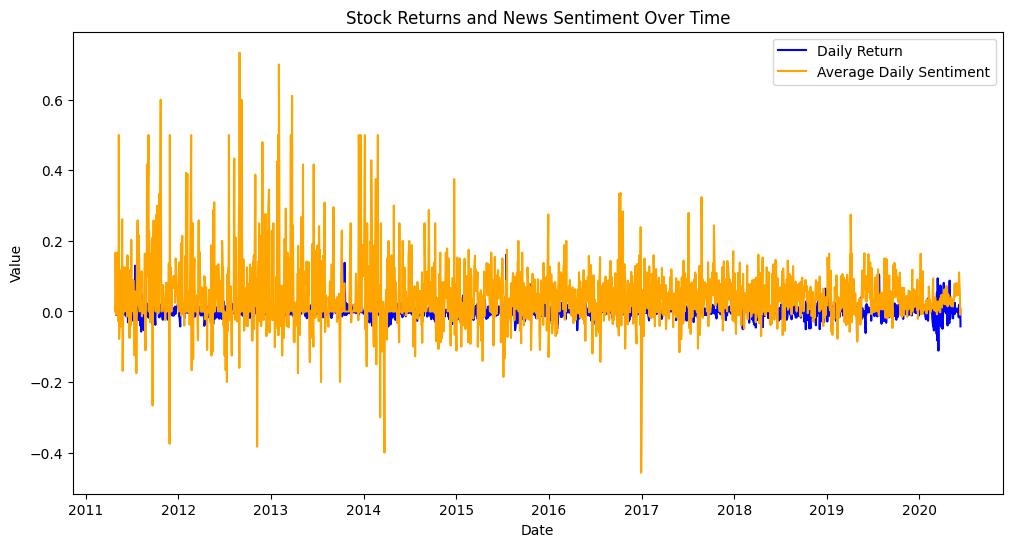

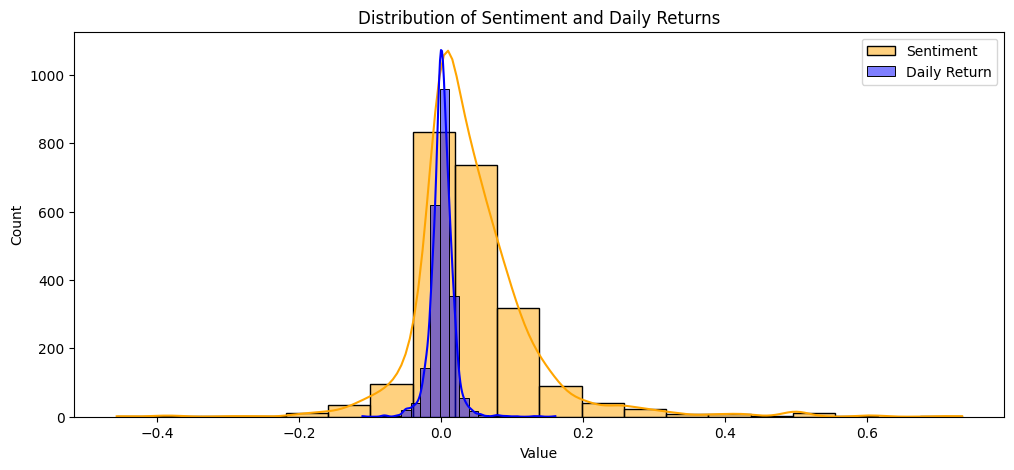

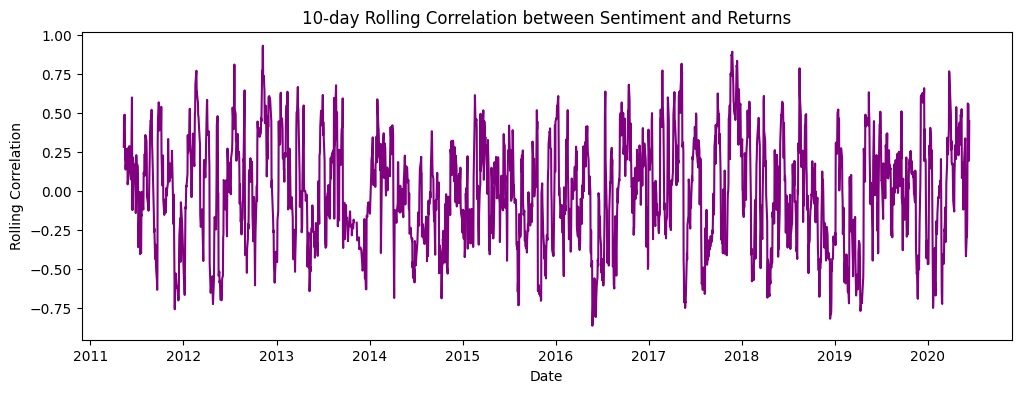

In [60]:
#Correlation Analysis: Use statistical methods to test 
# the correlationbetween daily news sentiment scores 
# and stock returns

# Assume news_df has columns: 'date' and 'sentiment'
news_df['sentiment'] = news_df['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'date':'Date'}, inplace=True)

print(daily_sentiment.head())
merged_df = pd.merge(daily_sentiment, stock_df, on='Date', how='inner')
print(merged_df[['Date','sentiment','Daily_Return_Percent']].head())

correlation = merged_df['Daily_Return'].corr(merged_df['sentiment'])
print(f"Correlation between news sentiment and daily stock returns: {correlation:.4f}")
#visualization correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(merged_df['sentiment'], merged_df['Daily_Return'], alpha=0.5)
plt.title("Daily Stock Returns vs News Sentiment")
plt.xlabel("Average Daily Sentiment")
plt.ylabel("Daily Stock Return")
plt.show()

#visaulization time series
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Daily_Return'], label='Daily Return', color='blue')
plt.plot(merged_df['Date'], merged_df['sentiment'], label='Average Daily Sentiment', color='orange')
plt.title("Stock Returns and News Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

#Density plot 
import seaborn as sns
plt.figure(figsize=(12,5))
sns.histplot(merged_df['sentiment'], kde=True, color='orange', label='Sentiment', bins=20)
sns.histplot(merged_df['Daily_Return'], kde=True, color='blue', label='Daily Return', bins=20)
plt.title("Distribution of Sentiment and Daily Returns")
plt.xlabel("Value")
plt.legend()
plt.show()

#heatmap[Rolling correlation]
merged_df['rolling_corr'] = merged_df['Daily_Return'].rolling(10).corr(merged_df['sentiment'])

plt.figure(figsize=(12,4))
plt.plot(merged_df['Date'], merged_df['rolling_corr'], color='purple')
plt.title("10-day Rolling Correlation between Sentiment and Returns")
plt.xlabel("Date")
plt.ylabel("Rolling Correlation")
plt.show()




In [61]:
##############################################################

Doing Correlation between news and stock movement for META

In [62]:
news_df= pd.read_csv('../data/raw_analyst_ratings.csv')
stock_df= pd.read_csv('../data/data/META.csv')

In [63]:
#Ensure that both datasets (news and stock prices) are aligned 
# by dates

# For news headlines
news_df['date'] = pd.to_datetime(news_df['date'],errors='coerce')
news_df = news_df.dropna(subset=['date'])
news_df['date'] = news_df['date'].dt.date
# For stock prices
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')
stock_df = stock_df.dropna(subset=['Date'])
stock_df['Date'] = stock_df['Date'].dt.date

print(news_df.head())
print(stock_df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock  
0  2020-06-05     A  
1  2020-06-03     A  
2  2020-05-26     A  
3  2020-05-22     A  
4  2020-05-22     A  
        

In [64]:
#Calculate Daily Stock Returns: Compute the percentage change in 
# daily closing prices to represent stock movements.


print(stock_df[['Date','Close']].head())
stock_df['Daily_Return'] = stock_df['Close'].pct_change()

stock_df = stock_df.dropna(subset=['Daily_Return'])

print(stock_df[['Date','Close','Daily_Return']].head())
stock_df['Daily_Return_Percent'] = stock_df['Daily_Return'] * 100
print(stock_df[['Date','Close','Daily_Return_Percent']].head())

         Date      Close
0  2012-05-18  37.995762
1  2012-05-21  33.821495
2  2012-05-22  30.810066
3  2012-05-23  31.803938
4  2012-05-24  32.827625
         Date      Close  Daily_Return
1  2012-05-21  33.821495     -0.109861
2  2012-05-22  30.810066     -0.089039
3  2012-05-23  31.803938      0.032258
4  2012-05-24  32.827625      0.032187
5  2012-05-25  31.714489     -0.033909
         Date      Close  Daily_Return_Percent
1  2012-05-21  33.821495            -10.986138
2  2012-05-22  30.810066             -8.903890
3  2012-05-23  31.803938              3.225802
4  2012-05-24  32.827625              3.218744
5  2012-05-25  31.714489             -3.390852


         Date  sentiment
0  2011-04-27   0.000000
1  2011-04-28   0.068182
2  2011-04-29   0.166667
3  2011-04-30   0.500000
4  2011-05-01   0.000000
         Date  sentiment  Daily_Return_Percent
0  2012-05-21   0.000000            -10.986138
1  2012-05-22   0.309524             -8.903890
2  2012-05-23   0.083333              3.225802
3  2012-05-24   0.000000              3.218744
4  2012-05-25   0.000000             -3.390852
Correlation between news sentiment and daily stock returns: -0.0003


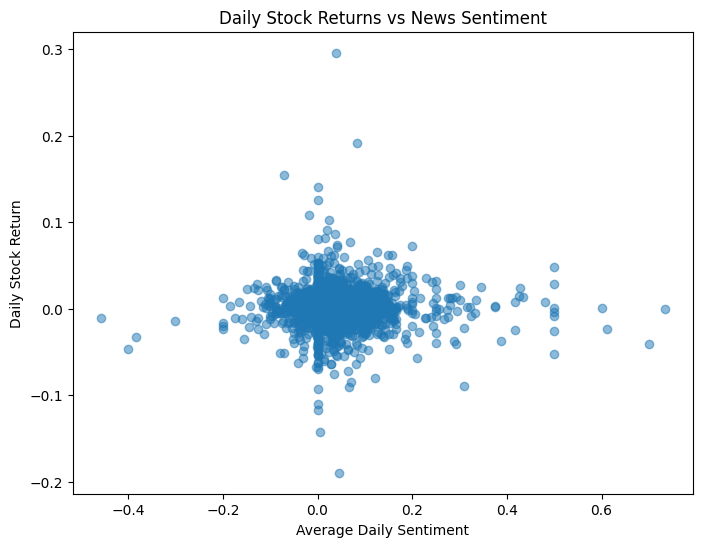

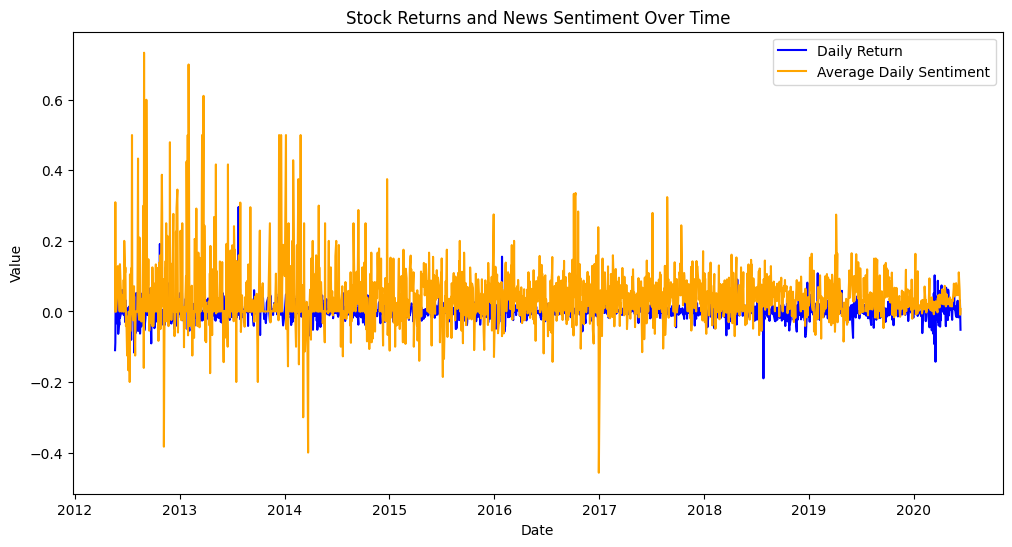

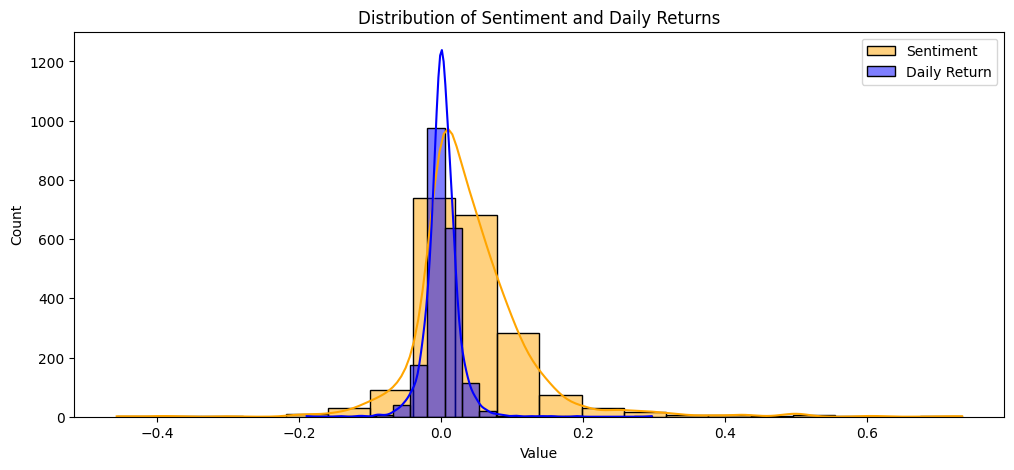

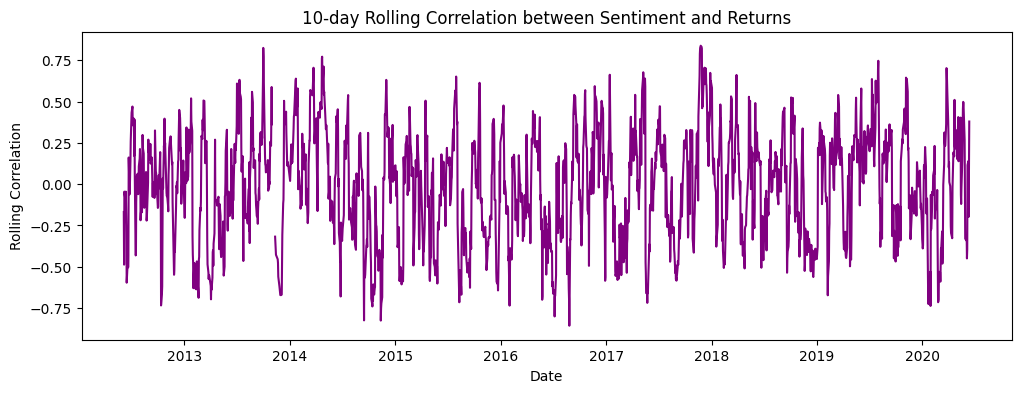

In [65]:
#Correlation Analysis: Use statistical methods to test 
# the correlationbetween daily news sentiment scores 
# and stock returns

# Assume news_df has columns: 'date' and 'sentiment'
news_df['sentiment'] = news_df['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'date':'Date'}, inplace=True)

print(daily_sentiment.head())
merged_df = pd.merge(daily_sentiment, stock_df, on='Date', how='inner')
print(merged_df[['Date','sentiment','Daily_Return_Percent']].head())

correlation = merged_df['Daily_Return'].corr(merged_df['sentiment'])
print(f"Correlation between news sentiment and daily stock returns: {correlation:.4f}")
#visualization correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(merged_df['sentiment'], merged_df['Daily_Return'], alpha=0.5)
plt.title("Daily Stock Returns vs News Sentiment")
plt.xlabel("Average Daily Sentiment")
plt.ylabel("Daily Stock Return")
plt.show()

#visaulization time series
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Daily_Return'], label='Daily Return', color='blue')
plt.plot(merged_df['Date'], merged_df['sentiment'], label='Average Daily Sentiment', color='orange')
plt.title("Stock Returns and News Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

#Density plot 
import seaborn as sns
plt.figure(figsize=(12,5))
sns.histplot(merged_df['sentiment'], kde=True, color='orange', label='Sentiment', bins=20)
sns.histplot(merged_df['Daily_Return'], kde=True, color='blue', label='Daily Return', bins=20)
plt.title("Distribution of Sentiment and Daily Returns")
plt.xlabel("Value")
plt.legend()
plt.show()

#heatmap[Rolling correlation]
merged_df['rolling_corr'] = merged_df['Daily_Return'].rolling(10).corr(merged_df['sentiment'])

plt.figure(figsize=(12,4))
plt.plot(merged_df['Date'], merged_df['rolling_corr'], color='purple')
plt.title("10-day Rolling Correlation between Sentiment and Returns")
plt.xlabel("Date")
plt.ylabel("Rolling Correlation")
plt.show()




Doing Correlation between news and stock movement for MSFT


In [66]:
news_df= pd.read_csv('../data/raw_analyst_ratings.csv')
stock_df= pd.read_csv('../data/data/MSFT.csv')

In [67]:
#Ensure that both datasets (news and stock prices) are aligned 
# by dates

# For news headlines
news_df['date'] = pd.to_datetime(news_df['date'],errors='coerce')
news_df = news_df.dropna(subset=['date'])
news_df['date'] = news_df['date'].dt.date
# For stock prices
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')
stock_df = stock_df.dropna(subset=['Date'])
stock_df['Date'] = stock_df['Date'].dt.date

print(news_df.head())
print(stock_df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock  
0  2020-06-05     A  
1  2020-06-03     A  
2  2020-05-26     A  
3  2020-05-22     A  
4  2020-05-22     A  
        

In [68]:
#Calculate Daily Stock Returns: Compute the percentage change in 
# daily closing prices to represent stock movements.


print(stock_df[['Date','Close']].head())
stock_df['Daily_Return'] = stock_df['Close'].pct_change()

stock_df = stock_df.dropna(subset=['Daily_Return'])

print(stock_df[['Date','Close','Daily_Return']].head())
stock_df['Daily_Return_Percent'] = stock_df['Daily_Return'] * 100
print(stock_df[['Date','Close','Daily_Return_Percent']].head())

         Date      Close
0  2009-01-02  14.872976
1  2009-01-05  15.011971
2  2009-01-06  15.187551
3  2009-01-07  14.273087
4  2009-01-08  14.719351
         Date      Close  Daily_Return
1  2009-01-05  15.011971      0.009345
2  2009-01-06  15.187551      0.011696
3  2009-01-07  14.273087     -0.060211
4  2009-01-08  14.719351      0.031266
5  2009-01-09  14.280397     -0.029822
         Date      Close  Daily_Return_Percent
1  2009-01-05  15.011971              0.934542
2  2009-01-06  15.187551              1.169606
3  2009-01-07  14.273087             -6.021148
4  2009-01-08  14.719351              3.126614
5  2009-01-09  14.280397             -2.982152


         Date  sentiment
0  2011-04-27   0.000000
1  2011-04-28   0.068182
2  2011-04-29   0.166667
3  2011-04-30   0.500000
4  2011-05-01   0.000000
         Date  sentiment  Daily_Return_Percent
0  2011-04-27   0.000000              0.725445
1  2011-04-28   0.068182              1.250976
2  2011-04-29   0.166667             -2.957733
3  2011-05-02  -0.009259             -1.003046
4  2011-05-03   0.000000              0.584514
Correlation between news sentiment and daily stock returns: -0.0118


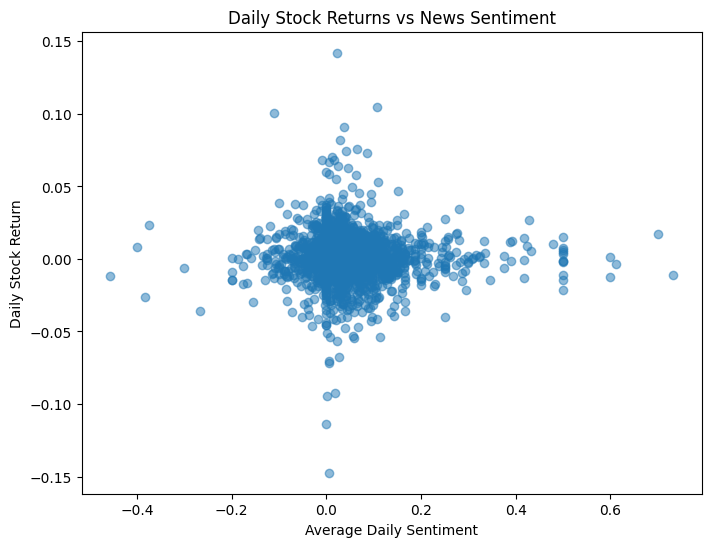

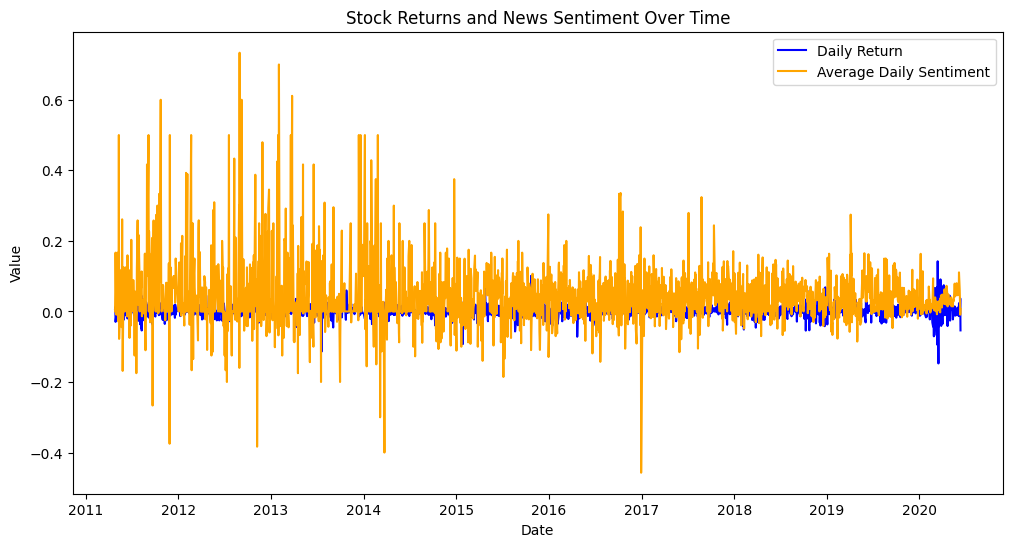

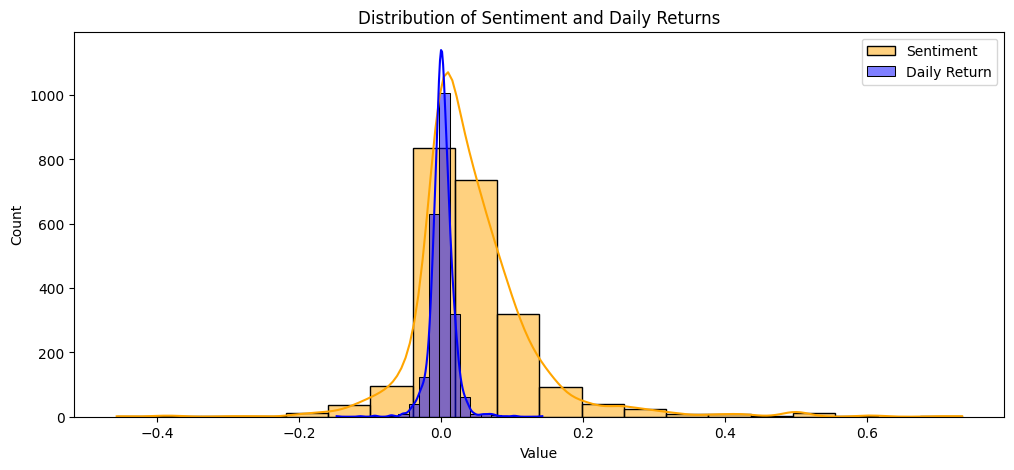

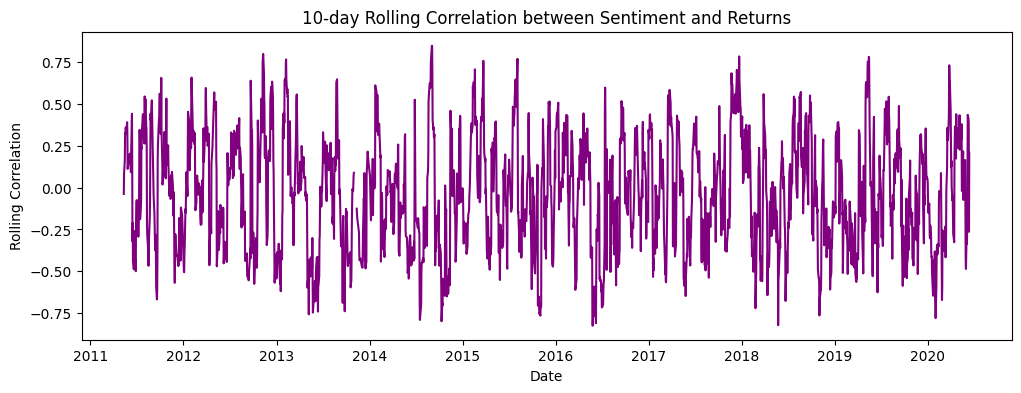

In [69]:
#Correlation Analysis: Use statistical methods to test 
# the correlationbetween daily news sentiment scores 
# and stock returns

# Assume news_df has columns: 'date' and 'sentiment'
news_df['sentiment'] = news_df['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'date':'Date'}, inplace=True)

print(daily_sentiment.head())
merged_df = pd.merge(daily_sentiment, stock_df, on='Date', how='inner')
print(merged_df[['Date','sentiment','Daily_Return_Percent']].head())

correlation = merged_df['Daily_Return'].corr(merged_df['sentiment'])
print(f"Correlation between news sentiment and daily stock returns: {correlation:.4f}")
#visualization correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(merged_df['sentiment'], merged_df['Daily_Return'], alpha=0.5)
plt.title("Daily Stock Returns vs News Sentiment")
plt.xlabel("Average Daily Sentiment")
plt.ylabel("Daily Stock Return")
plt.show()

#visaulization time series
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Daily_Return'], label='Daily Return', color='blue')
plt.plot(merged_df['Date'], merged_df['sentiment'], label='Average Daily Sentiment', color='orange')
plt.title("Stock Returns and News Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

#Density plot 
import seaborn as sns
plt.figure(figsize=(12,5))
sns.histplot(merged_df['sentiment'], kde=True, color='orange', label='Sentiment', bins=20)
sns.histplot(merged_df['Daily_Return'], kde=True, color='blue', label='Daily Return', bins=20)
plt.title("Distribution of Sentiment and Daily Returns")
plt.xlabel("Value")
plt.legend()
plt.show()

#heatmap[Rolling correlation]
merged_df['rolling_corr'] = merged_df['Daily_Return'].rolling(10).corr(merged_df['sentiment'])

plt.figure(figsize=(12,4))
plt.plot(merged_df['Date'], merged_df['rolling_corr'], color='purple')
plt.title("10-day Rolling Correlation between Sentiment and Returns")
plt.xlabel("Date")
plt.ylabel("Rolling Correlation")
plt.show()




Doing Correlation between news and stock movement for NVDA

In [70]:
news_df= pd.read_csv('../data/raw_analyst_ratings.csv')
stock_df= pd.read_csv('../data/data/NVDA.csv')

In [71]:
#Ensure that both datasets (news and stock prices) are aligned 
# by dates

# For news headlines
news_df['date'] = pd.to_datetime(news_df['date'],errors='coerce')
news_df = news_df.dropna(subset=['date'])
news_df['date'] = news_df['date'].dt.date
# For stock prices
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')
stock_df = stock_df.dropna(subset=['Date'])
stock_df['Date'] = stock_df['Date'].dt.date

print(news_df.head())
print(stock_df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock  
0  2020-06-05     A  
1  2020-06-03     A  
2  2020-05-26     A  
3  2020-05-22     A  
4  2020-05-22     A  
        

In [72]:
#Calculate Daily Stock Returns: Compute the percentage change in 
# daily closing prices to represent stock movements.


print(stock_df[['Date','Close']].head())
stock_df['Daily_Return'] = stock_df['Close'].pct_change()

stock_df = stock_df.dropna(subset=['Daily_Return'])

print(stock_df[['Date','Close','Daily_Return']].head())
stock_df['Daily_Return_Percent'] = stock_df['Daily_Return'] * 100
print(stock_df[['Date','Close','Daily_Return_Percent']].head())

         Date     Close
0  2009-01-02  0.199652
1  2009-01-05  0.203319
2  2009-01-06  0.210196
3  2009-01-07  0.197589
4  2009-01-08  0.192546
         Date     Close  Daily_Return
1  2009-01-05  0.203319      0.018370
2  2009-01-06  0.210196      0.033822
3  2009-01-07  0.197589     -0.059978
4  2009-01-08  0.192546     -0.025522
5  2009-01-09  0.181773     -0.055952
         Date     Close  Daily_Return_Percent
1  2009-01-05  0.203319              1.836972
2  2009-01-06  0.210196              3.382205
3  2009-01-07  0.197589             -5.997831
4  2009-01-08  0.192546             -2.552240
5  2009-01-09  0.181773             -5.595202


         Date  sentiment
0  2011-04-27   0.000000
1  2011-04-28   0.068182
2  2011-04-29   0.166667
3  2011-04-30   0.500000
4  2011-05-01   0.000000
         Date  sentiment  Daily_Return_Percent
0  2011-04-27   0.000000              0.000000
1  2011-04-28   0.068182              1.088095
2  2011-04-29   0.166667              2.511531
3  2011-05-02  -0.009259             -1.350002
4  2011-05-03   0.000000             -4.764338
Correlation between news sentiment and daily stock returns: 0.0091


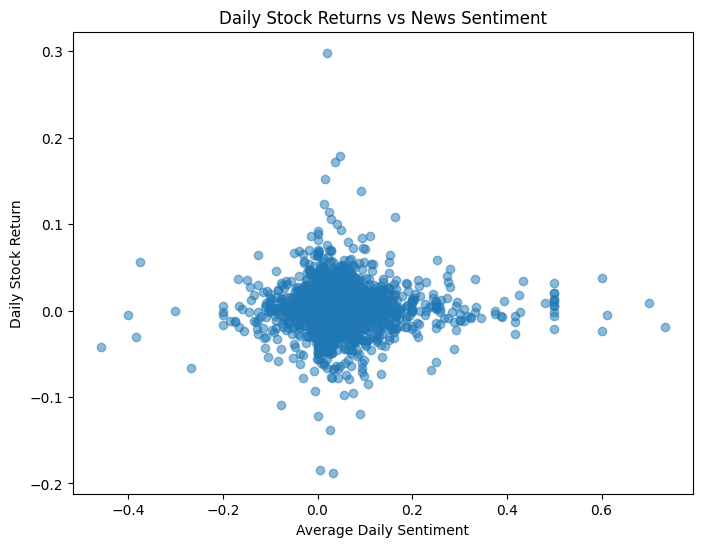

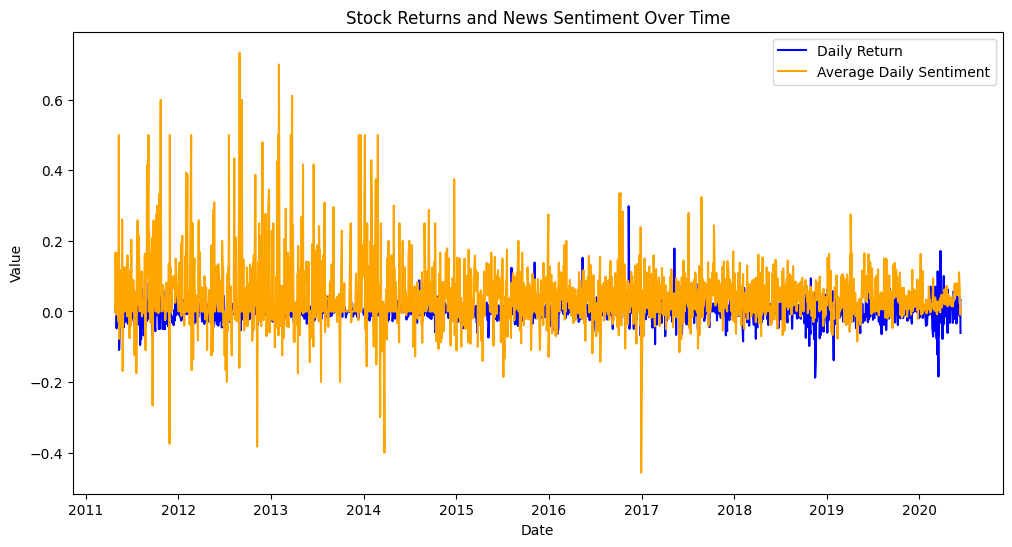

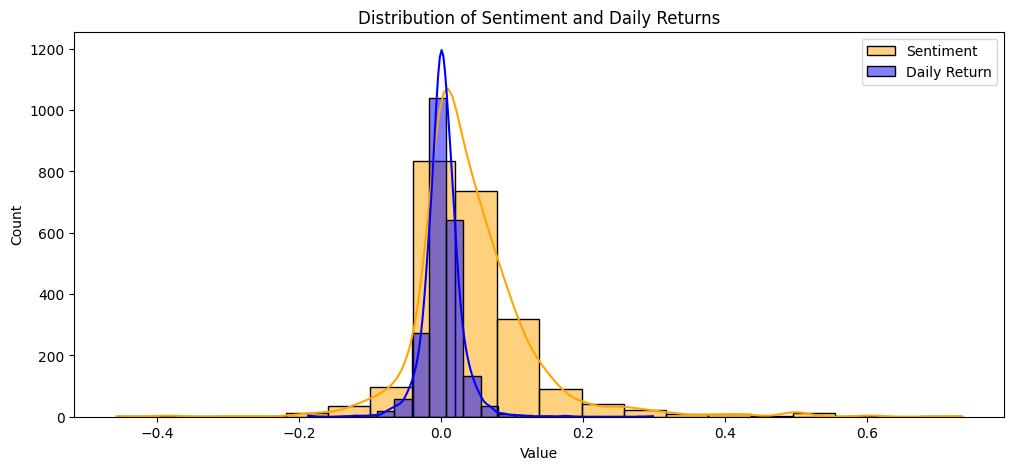

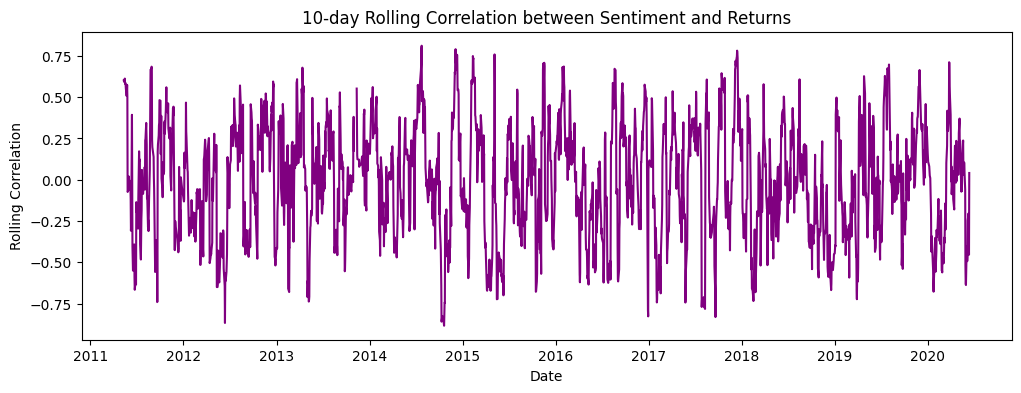

In [73]:
#Correlation Analysis: Use statistical methods to test 
# the correlationbetween daily news sentiment scores 
# and stock returns

# Assume news_df has columns: 'date' and 'sentiment'
news_df['sentiment'] = news_df['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'date':'Date'}, inplace=True)

print(daily_sentiment.head())
merged_df = pd.merge(daily_sentiment, stock_df, on='Date', how='inner')
print(merged_df[['Date','sentiment','Daily_Return_Percent']].head())

correlation = merged_df['Daily_Return'].corr(merged_df['sentiment'])
print(f"Correlation between news sentiment and daily stock returns: {correlation:.4f}")
#visualization correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(merged_df['sentiment'], merged_df['Daily_Return'], alpha=0.5)
plt.title("Daily Stock Returns vs News Sentiment")
plt.xlabel("Average Daily Sentiment")
plt.ylabel("Daily Stock Return")
plt.show()

#visaulization time series
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Daily_Return'], label='Daily Return', color='blue')
plt.plot(merged_df['Date'], merged_df['sentiment'], label='Average Daily Sentiment', color='orange')
plt.title("Stock Returns and News Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

#Density plot 
import seaborn as sns
plt.figure(figsize=(12,5))
sns.histplot(merged_df['sentiment'], kde=True, color='orange', label='Sentiment', bins=20)
sns.histplot(merged_df['Daily_Return'], kde=True, color='blue', label='Daily Return', bins=20)
plt.title("Distribution of Sentiment and Daily Returns")
plt.xlabel("Value")
plt.legend()
plt.show()

#heatmap[Rolling correlation]
merged_df['rolling_corr'] = merged_df['Daily_Return'].rolling(10).corr(merged_df['sentiment'])

plt.figure(figsize=(12,4))
plt.plot(merged_df['Date'], merged_df['rolling_corr'], color='purple')
plt.title("10-day Rolling Correlation between Sentiment and Returns")
plt.xlabel("Date")
plt.ylabel("Rolling Correlation")
plt.show()


